In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [2]:
acc=pd.read_csv('accidents_2017.csv')
acc.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [3]:
acc.shape

(10339, 15)

In [4]:
acc.isnull().any()

Id                   False
District Name        False
Neighborhood Name    False
Street               False
Weekday              False
Month                False
Day                  False
Hour                 False
Part of the day      False
Mild injuries        False
Serious injuries     False
Victims              False
Vehicles involved    False
Longitude            False
Latitude             False
dtype: bool

In [5]:
acc.describe()

,Day,Hour,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
count,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000
mean,15.775994,13.811394,1.154174,0.023310,1.178644,1.920979,2.162832,41.399346
std,8.763455,5.316490,0.742294,0.163803,0.735145,0.714011,0.024176,0.021251
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.091855,41.323094
25%,8.000000,10.000000,1.000000,0.000000,1.000000,2.000000,2.144985,41.386288
50%,16.000000,14.000000,1.000000,0.000000,1.000000,2.000000,2.163399,41.396730
75%,23.000000,18.000000,1.000000,0.000000,1.000000,2.000000,2.180179,41.411038
max,31.000000,23.000000,10.000000,4.000000,10.000000,14.000000,2.222572,41.468244


In [6]:
acc.columns

Index(['Id', 'District Name', 'Neighborhood Name', 'Street', 'Weekday',
       'Month', 'Day', 'Hour', 'Part of the day', 'Mild injuries',
       'Serious injuries', 'Victims', 'Vehicles involved', 'Longitude',
       'Latitude'],
      dtype='object')

In [7]:
acc.dtypes

Id                    object
District Name         object
Neighborhood Name     object
Street                object
Weekday               object
Month                 object
Day                    int64
Hour                   int64
Part of the day       object
Mild injuries          int64
Serious injuries       int64
Victims                int64
Vehicles involved      int64
Longitude            float64
Latitude             float64
dtype: object

In [8]:
acc['Weekday'].value_counts()

Friday       1761
Tuesday      1691
Thursday     1677
Wednesday    1650
Monday       1510
Saturday     1155
Sunday        895
Name: Weekday, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026509AF4CC0>,
      dtype=object)

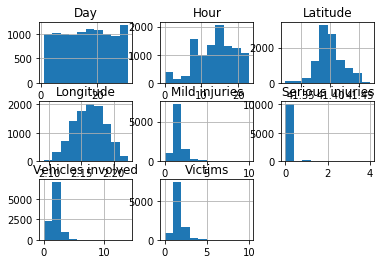

In [9]:
df=pd.DataFrame(acc,columns=['District Name','Neighborhood Name','Street','Weekday','Month','Day','Hour','Part of the day','Mild injuries','Serious injuries','Victims','Vehicles involved','Longitude','Latitude'])
df.hist()

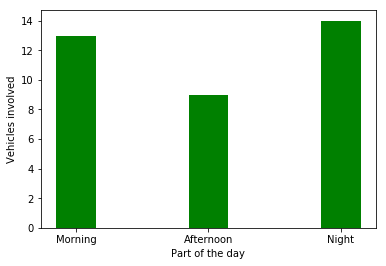

In [10]:
plt.figure()
plt.bar(df['Part of the day'], df['Vehicles involved'],width=0.3,color='green') 
plt.xlabel("Part of the day") 
plt.ylabel("Vehicles involved") 
plt.show() 

In [11]:
acc['Part of the day'].value_counts()

Afternoon    5082
Morning      4067
Night        1190
Name: Part of the day, dtype: int64

In [12]:
acc['Part of the day'].replace(['Morning','Afternoon','Night'],[0,1,2],inplace = True)

In [13]:
acc['Part of the day'].value_counts()

1    5082
0    4067
2    1190
Name: Part of the day, dtype: int64

In [14]:
acc['Serious injuries'].value_counts()

0    10116
1      207
2       15
4        1
Name: Serious injuries, dtype: int64

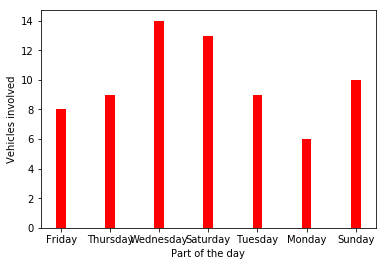

In [15]:
plt.figure()
plt.bar(df['Weekday'], df['Vehicles involved'],width=0.2,color='red') 
plt.xlabel("Part of the day") 
plt.ylabel("Vehicles involved") 
plt.show() 

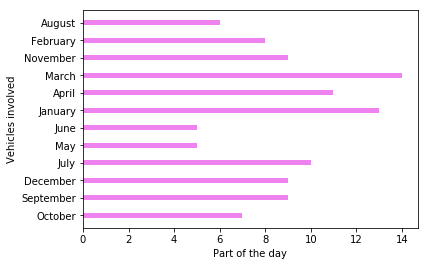

In [16]:
plt.figure()
plt.barh(acc['Month'], acc['Vehicles involved'],height=0.3,color='violet') 
plt.xlabel("Part of the day") 
plt.ylabel("Vehicles involved") 
plt.show() 

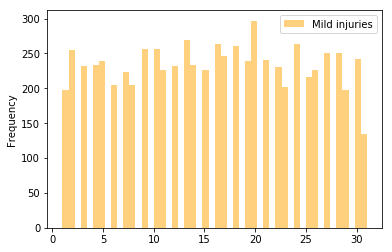

In [17]:
mild=acc[acc["Mild injuries"]==1]
mild['Day'].plot.hist(alpha=0.5,color='orange',bins=50)
plt.legend(['Mild injuries'])
plt.show()

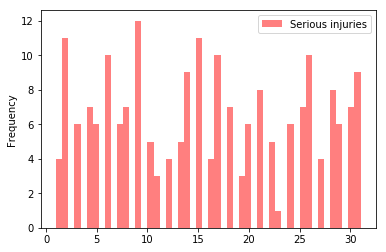

In [18]:
S=acc[acc["Serious injuries"]==1]
S['Day'].plot.hist(alpha=0.5,color='red',bins=50)
plt.legend(['Serious injuries'])
plt.show()

<BarContainer object of 10339 artists>

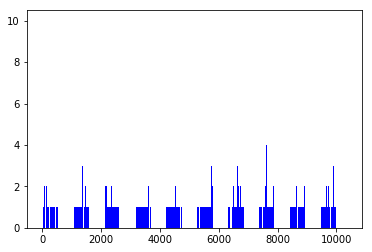

In [19]:
plt.figure()
xvals = range(len(acc['Victims']))
plt.bar(xvals, acc['Victims'], width = 0.5,color='b')

Text(0.5, 1.0, 'accident analysis')

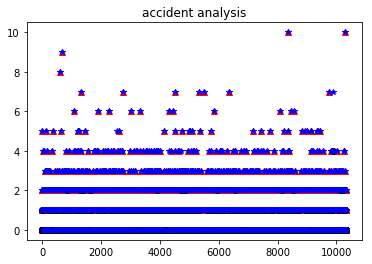

In [20]:
plt.plot(acc['Mild injuries'],'r^',acc['Serious injuries'],'ko',acc['Victims'],'b*')
plt.title('accident analysis')

C:\Users\NIKHIL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


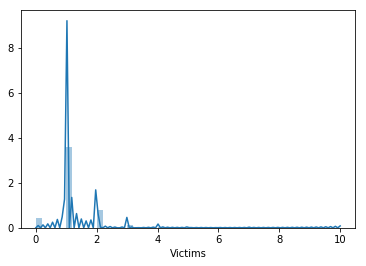

In [21]:
sns.distplot(acc['Victims'])

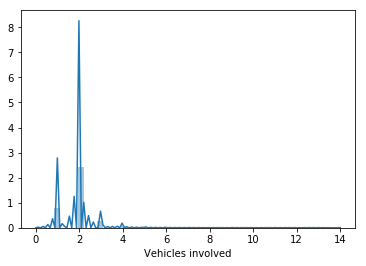

In [22]:
sns.distplot(acc['Vehicles involved'])

# Box Plot

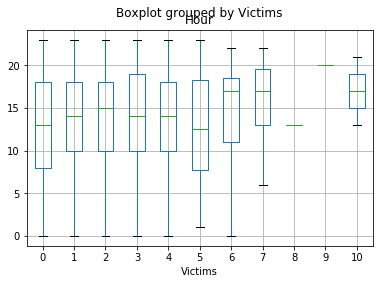

In [23]:
%matplotlib inline
acc.boxplot(column = 'Hour',by = 'Victims')

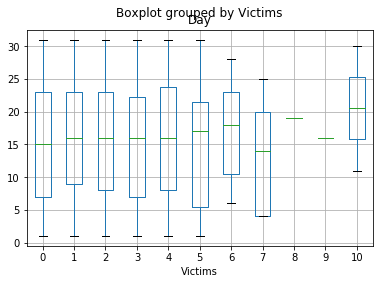

In [24]:
acc.boxplot(column = 'Day',by = 'Victims')

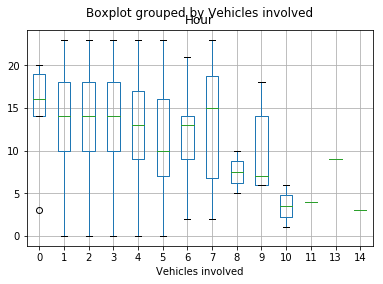

In [25]:
acc.boxplot(column = 'Hour',by = 'Vehicles involved')

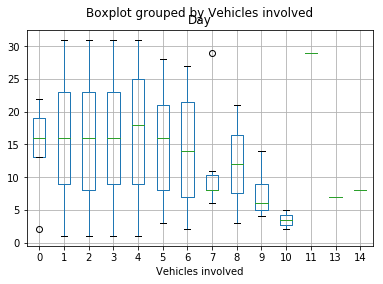

In [26]:
acc.boxplot(column = 'Day',by = 'Vehicles involved')

In [27]:
acc['Month'].replace(['January','February','March','April','May','June','July','August','September','October','November','December'],[0,1,2,3,4,5,6,7,8,9,10,11],inplace = True)
acc['Month'].value_counts()

10    991
4     963
2     935
9     928
6     918
5     908
3     845
0     844
1     824
8     769
11    762
7     652
Name: Month, dtype: int64

In [28]:
acc['Weekday'].value_counts()

Friday       1761
Tuesday      1691
Thursday     1677
Wednesday    1650
Monday       1510
Saturday     1155
Sunday        895
Name: Weekday, dtype: int64

In [29]:
X=acc[['Day','Hour','Month','Longitude','Latitude']]
y=acc['Victims']
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.5,random_state=0)

In [30]:
train_X.head()

,Day,Hour,Month,Longitude,Latitude
3528,16,16,0,2.155837,41.408980
1206,2,13,4,2.183461,41.430191
6354,30,18,7,2.195297,41.442666
923,13,15,11,2.127234,41.398941
8807,18,16,0,2.172348,41.426511


In [31]:
test_X.head()

,Day,Hour,Month,Longitude,Latitude
9679,9,15,11,2.175428,41.400076
3039,28,9,10,2.179060,41.392237
6690,27,11,8,2.144892,41.383925
1379,3,7,2,2.191410,41.406811
159,6,7,1,2.213302,41.405646


In [32]:
train_y.head()

3528    2
1206    1
6354    1
923     2
8807    2
Name: Victims, dtype: int64

In [33]:
test_y.head()

9679    1
3039    1
6690    1
1379    1
159     1
Name: Victims, dtype: int64

# Gnu Plot

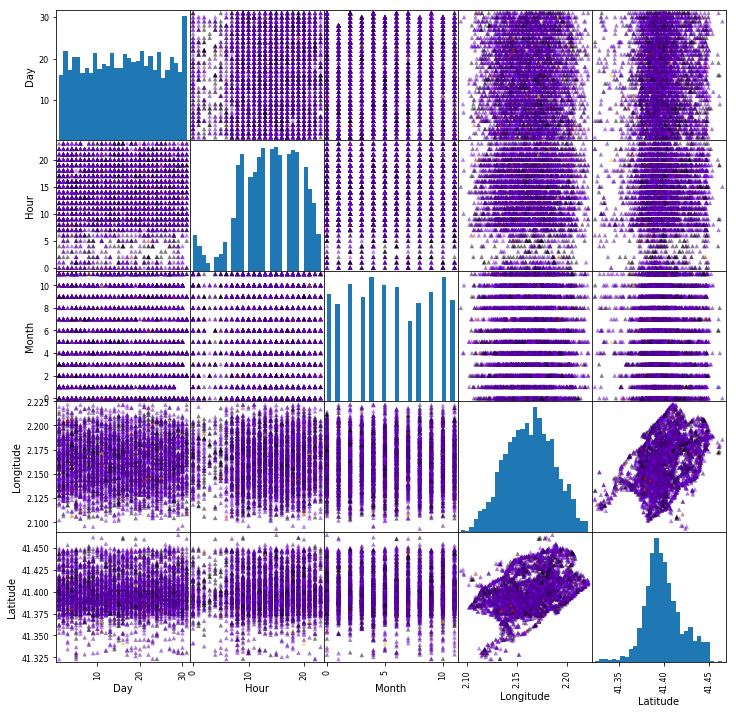

In [34]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(train_X, c= train_y, marker = '^', s=20, hist_kwds={'bins':30}, figsize=(12,12), cmap=cmap)

# Knn Classification

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_X,train_y)
model.predict(test_X)
print('Accuracy of Knn classifier on training set: {:.2f}'
     .format(model.score(train_X,train_y)))
print('Accuracy of Knn classifier on test set: {:.2f}'
     .format(model.score(test_X,test_y)))

Accuracy of Knn classifier on training set: 0.73
Accuracy of Knn classifier on test set: 0.68


# use the trained knn classifier model to classify new, previously unseen objects

In [36]:
p=model.predict([[13,21,3,2.12345,41.2345678]])
p[0]

1

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lr=LogisticRegression()
lr.fit(train_X,train_y)
lr.predict(test_X)
print('Accuracy of Knn classifier on training set: {:.2f}'
     .format(lr.score(train_X,train_y)))
print('Accuracy of Knn classifier on test set: {:.2f}'
     .format(lr.score(test_X,test_y)))

Accuracy of Knn classifier on training set: 0.72
Accuracy of Knn classifier on test set: 0.71


C:\Users\NIKHIL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NIKHIL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
RFmodel=RandomForestClassifier(n_estimators = 10,
                            random_state=0).fit(train_X,train_y)
RFmodel.predict(test_X)
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(RFmodel.score(train_X,train_y)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(RFmodel.score(test_X,test_y)))

Accuracy of RF classifier on training set: 0.97
Accuracy of RF classifier on test set: 0.69


# GuassianNB

In [39]:
from sklearn.naive_bayes import GaussianNB
Gmodel=GaussianNB().fit(train_X,train_y)
Gmodel.predict(test_X)
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(Gmodel.score(train_X,train_y)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(Gmodel.score(test_X,test_y)))

Accuracy of GaussianNB classifier on training set: 0.72
Accuracy of GaussianNB classifier on test set: 0.71


# Correlation 

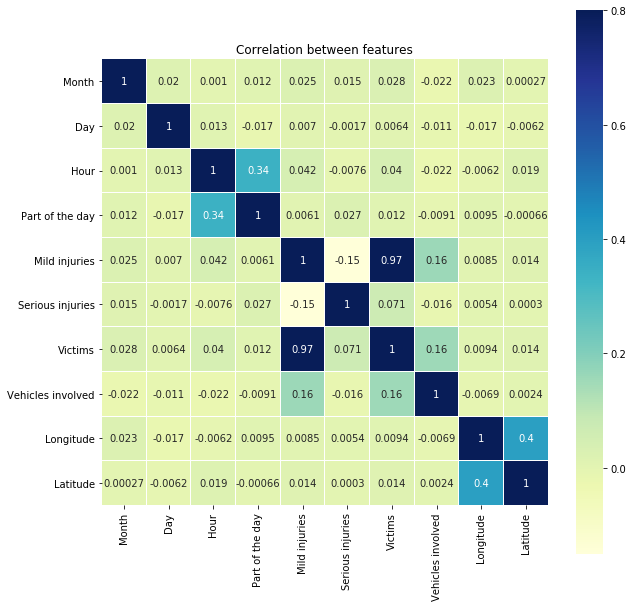

In [40]:
import seaborn as sns
corr=acc.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

# Support Vector Classification

In [42]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf',probability = True)
svc_classifier = svc.fit(train_X,train_y)
print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(Gmodel.score(train_X,train_y)))
print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(Gmodel.score(test_X,test_y)))

C:\Users\NIKHIL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVC classifier on training set: 0.72
Accuracy of SVC classifier on test set: 0.71


# cross validation score

In [43]:
from sklearn.model_selection import cross_val_score,cross_val_predict
svc_acc = cross_val_score(svc_classifier,train_X,train_y,cv = 3,scoring = 'accuracy',n_jobs = -1)
svc_proba = cross_val_predict(svc_classifier,train_X,train_y,cv = 3,method = 'predict_proba')
svc_scores = svc_proba[:,1]


C:\Users\NIKHIL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\NIKHIL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\NIKHIL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\NIKHIL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:865: RuntimeWarning: Number of classes in training 

In [44]:
svc_acc

array([0.71180556, 0.71345708, 0.71636575])

In [45]:
y_pred = svc.predict(test_X)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
print("Accuracy score:%f"%(accuracy_score(test_y,y_pred)*100))

Accuracy score:71.179884


# plotting a 3D scatter plot

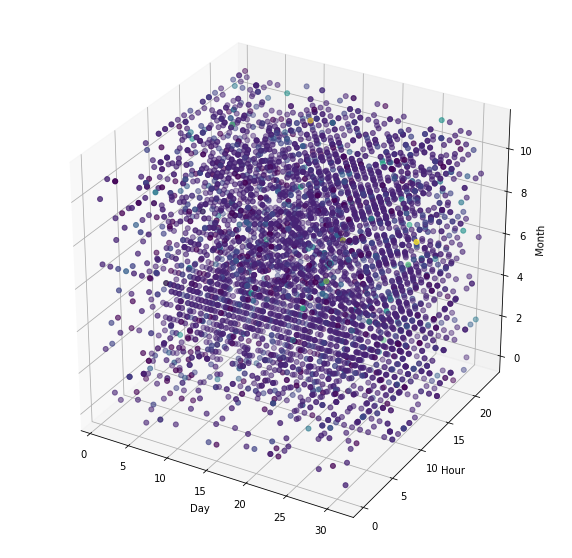

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')                           
ax.scatter(train_X['Day'],train_X['Hour'],train_X['Month'],c=train_y,marker='.',s=100)
ax.set_xlabel('Day')
ax.set_ylabel('Hour')
ax.set_zlabel('Month')
plt.show()


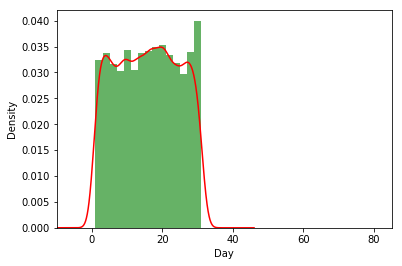

In [48]:
ax=df["Day"].hist(bins=15, density=True, stacked=True, color='green', alpha=0.6)
df["Day"].plot(kind='density', color='red')
ax.set(xlabel='Day')
plt.xlim(-10,85)
plt.show()

C:\Users\NIKHIL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


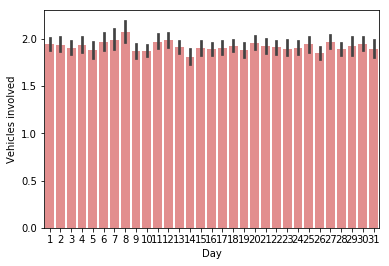

In [49]:
sns.barplot('Day','Vehicles involved', data=df, color="lightcoral")
plt.show()

#How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

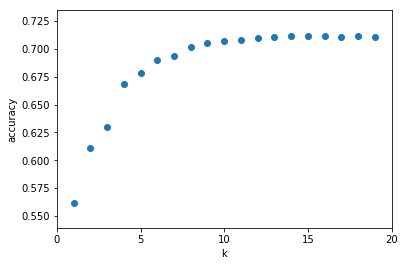

In [50]:
 k_range = range(1,20)
scores = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X,train_y)
    scores.append(knn.score(test_X,test_y))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]); 

How sensitive is k-NN classification acuuracy to the train/test split proportion?

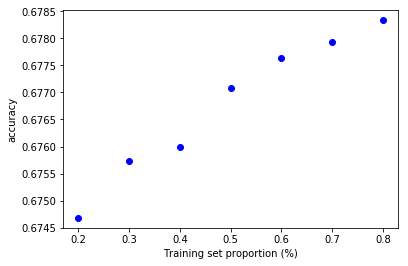

In [51]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
knn = KNeighborsClassifier(n_neighbors = 5)
plt.figure()
for s in t:
    scores = []
    for i in range(1,1000):
        train_X,test_X,train_y,test_y=train_test_split(X, y, test_size = 1-s)
        knn.fit(train_X,train_y)
        scores.append(knn.score(test_X,test_y))
    plt.plot(s, np.mean(scores),'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

# Result

The accuracy of KNN classifier on test set is:0.68

The accuracy of Logistic regression on test set is:0.71

The accuracy of Random Forest classifier on test set is:0.69

The accuracy of GuassianNB classifier on test set is:0.71

The accuracy of SVC classifier on test set is:0.71

So, from the result we can say that Logistic regression, GuassianNB and SVC yielding the highest accuracy on acidents data set.

Overall Accuracy score is : 71.179884